In [1]:
import torch
torch.manual_seed(6)
x = torch.randn(4, 4, requires_grad=True)
y = torch.randn(4, 4, requires_grad=True)
u = torch.randn(4, 4, requires_grad=True)
z = x * y*u
l = z.sum()
l.backward()
print(x.grad)
print(y.grad)


tensor([[-2.8918,  0.4742,  0.6208,  0.3573],
        [-0.0795,  0.4714,  2.0265,  0.6418],
        [ 0.9364, -0.0040, -0.2763,  0.8219],
        [ 0.4053,  0.1325, -0.0042, -0.3059]])
tensor([[-2.3667, -0.2812, -2.5162, -1.1943],
        [ 0.2673, -0.0846, -0.6763,  0.1132],
        [ 0.3349, -0.0052, -0.7993, -0.3788],
        [-0.3790, -0.4033, -0.3808,  1.2394]])


In [2]:

torch.manual_seed(6)
x = torch.randn(4, 4, requires_grad=True)
y = torch.randn(4, 4, requires_grad=True)
u = torch.randn(4, 4, requires_grad=True)
z = x * y*u

l = z.sum()


In [3]:
import inspect

dl = torch.tensor(1.)
back_sum = l.grad_fn
dz = back_sum(dl)
back_mul = back_sum.next_functions[0][0]

dx, dy = back_mul(dz)
back_x = back_mul.next_functions[0][0]
back_x(dx)
back_y = back_mul.next_functions[1][0]
back_y(dy)
print(dir(back_sum))
#print(back_sum._register_hook_dict(1))
#print(type(back_mul))
#print(id(back_mul))
#print(back_x)
#print(x.grad)
#print(z.grad)
print(l.equal(back_mul._saved_self))

#q=[]
#q.append(back_sum)
#while len(q)!=0:
#    n=q.pop(0)
#   
#    for next in n.next_functions:
#        q.append(next[0])
#        print(type(n).__name__,"->",type(next[0]).__name__)



['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_register_hook_dict', '_saved_self_sym_sizes', 'metadata', 'name', 'next_functions', 'register_hook', 'register_prehook', 'requires_grad']
False


In [4]:
a, b = torch.randn(2, requires_grad=True).unbind()
c = a+b
print(c.grad_fn.next_functions)

((<UnbindBackward0 object at 0x7fe2204c43a0>, 0), (<UnbindBackward0 object at 0x7fe2204c43a0>, 1))


In [5]:
x = torch.randn(5, requires_grad=True)
y = x.pow(2)
print(x.equal(y.grad_fn._saved_self))  # True
print(x is y.grad_fn._saved_self)  # True


True
True


In [6]:
x=torch.rand(1,requires_grad=True)
y=torch.rand(1,requires_grad=True)
z=torch.rand(1,requires_grad=True)
w=torch.rand(1,requires_grad=True)
l=x*y*z*w
print(x)
print(y)
print(z)
print(w)
dl=l.grad_fn.next_functions

tensor([0.4372], requires_grad=True)
tensor([0.6281], requires_grad=True)
tensor([0.8552], requires_grad=True)
tensor([0.4044], requires_grad=True)


In [7]:
dl[1][0](torch.tensor(1.))

()

In [8]:
print(x.grad,y.grad,z.grad,w.grad)

None None None tensor([1.])


In [15]:
x=torch.rand(4,requires_grad=True)
y=torch.rand(4,requires_grad=True)
z=torch.matmul(x,y)
l=z.sum()


In [21]:
l.grad_fn.next_functions[0][0](torch.tensor(1.))    

(tensor([0.3278, 0.3761, 0.6950, 0.4399], grad_fn=<MulBackward0>),
 tensor([0.9636, 0.7714, 0.2812, 0.4724], grad_fn=<MulBackward0>))

In [23]:
z.grad_fn.next_functions

((<AccumulateGrad at 0x7fe154e2e3b0>, 0),
 (<AccumulateGrad at 0x7fe154e2f3a0>, 0))

In [11]:
#print(l.grad_fn._register_hook_dict())

In [49]:
import torch
torch.manual_seed(0)
x=torch.rand((2,2),requires_grad=True)
y=torch.rand((2,2),requires_grad=True)
z=torch.matmul(x,y)

z.retain_grad()
l=torch.matmul(z,z).sum()


In [59]:
print(l.grad_fn.next_functions[0][0]._saved_mat2)
print(l.grad_fn.next_functions[0][0]._saved_self)

tensor([[0.5291, 1.0033],
        [0.0919, 0.1745]], grad_fn=<MmBackward0>)
tensor([[0.5291, 1.0033],
        [0.0919, 0.1745]], grad_fn=<MmBackward0>)


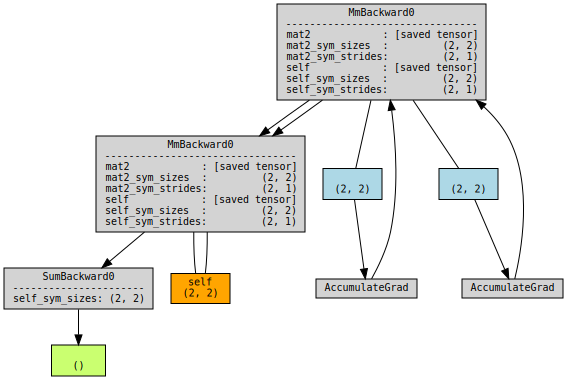

In [50]:
import torchviz
torchviz.make_dot(l,show_attrs=True,show_saved=True)

In [40]:
dz=l.grad_fn.next_functions[0][0]

In [41]:
dz.next_functions

((<MmBackward0 at 0x7fe404d13bb0>, 0), (<MmBackward0 at 0x7fe404d13bb0>, 0))

In [26]:
print(torch.autograd.grad(l,z))
print(z)

(tensor([[2.1534, 0.8873],
        [2.7102, 1.4442]]),)
tensor([[0.5291, 1.0033],
        [0.0919, 0.1745]], grad_fn=<MmBackward0>)


In [2]:
print(dir(l.grad_fn))

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_register_hook_dict', '_saved_self_sym_sizes', 'metadata', 'name', 'next_functions', 'register_hook', 'register_prehook', 'requires_grad']


In [33]:
def get_fn_name(fn):
    return str(type(fn).__name__)

def preorder(grad_fn,input):
    vals=grad_fn(input)
    print(grad_fn)
#    if hasattr(grad_fn,'_saved_self'):
#        print(grad_fn)
#        print(grad_fn._saved_self.requires_grad)
#        print(grad_fn._saved_self)
#    if hasattr(grad_fn,'_saved_tensor'):
#        pass
#        print(grad_fn)
#        print(grad_fn._saved_tensor.requires_grad)
#        print(grad_fn._saved_tensor)
    if isinstance(vals,tuple):
        for (f,idx),val in zip(grad_fn.next_functions,vals):
            preorder(f,val)
    else:
        preorder(grad_fn.next_functions[0][0],vals)

In [36]:
with torch.no_grad():
    preorder(l.grad_fn,torch.tensor(1.))

In [144]:
with torch.no_grad():
    l_grad_fn=l.grad_fn
    dl=l_grad_fn(torch.tensor(1.))
    z_grad_fn=l_grad_fn.next_functions[0][0]
    print(dir(z_grad_fn))
#print(z_grad_fn(dl))
    dz=z_grad_fn(dl)
    #print(dz)
    
    x_grad_fn=z_grad_fn.next_functions[0][0]
    dx=x_grad_fn(dz[0])
    y_grad_fn=z_grad_fn.next_functions[1][0]
    dy=y_grad_fn(dz[1])
    

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_raw_saved_self', '_raw_saved_tensor', '_register_hook_dict', '_saved_self', '_saved_tensor', 'metadata', 'name', 'next_functions', 'register_hook', 'register_prehook', 'requires_grad']


In [162]:
print(x.grad)
print(y.grad)
print(z.grad)
print(x)
print(y)

tensor([0.6148, 1.2682, 0.9802, 1.7929])
tensor([0.9925, 1.5364, 0.1770, 0.2641])
None
tensor([0.4963, 0.7682, 0.0885, 0.1320], requires_grad=True)
tensor([0.3074, 0.6341, 0.4901, 0.8964], requires_grad=True)


In [80]:
assert(id(x_grad_fn.variable)==id(x))

l_grad_fn.requires_grad

True

In [136]:
print(dir(z_grad_fn))

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_raw_saved_self', '_raw_saved_tensor', '_register_hook_dict', '_saved_self', '_saved_tensor', 'metadata', 'name', 'next_functions', 'register_hook', 'register_prehook', 'requires_grad']


In [132]:
if hasattr(z_grad_fn,'_saved_self'):
    print(getattr(z_grad_fn,'_saved_self'))
if hasattr(z_grad_fn,'_saved_tensor'):
    print(getattr(z_grad_fn,'_saved_tensor'))
if hasattr(z_grad_fn,'_register_hook_dict'):
    #print(getattr(z_grad_fn,'_register_hook_dict'))
    print(z_grad_fn.super())

tensor([0.4963, 0.7682, 0.0885, 0.1320], requires_grad=True)
tensor([0.3074, 0.6341, 0.4901, 0.8964], requires_grad=True)


AttributeError: 'DotBackward0' object has no attribute 'super'

In [57]:
dz

(tensor([0.3074, 0.6341, 0.4901, 0.8964], grad_fn=<MulBackward0>),
 tensor([0.4963, 0.7682, 0.0885, 0.1320], grad_fn=<MulBackward0>))

In [49]:
l.backward()

In [50]:
print(x.grad,y.grad,z.grad)

tensor([0.3074, 0.6341, 0.4901, 0.8964]) tensor([0.4963, 0.7682, 0.0885, 0.1320]) tensor(1.)


In [41]:
x=torch.tensor(1.,requires_grad=True)
y=torch.tensor(2.,requires_grad=True)
z=x+y


In [30]:
z.backward()

In [19]:
dz=z.grad_fn(torch.tensor(1.))

In [20]:
print(dz)

(tensor(1.), tensor(1.))


In [42]:
preorder(z.grad_fn,torch.tensor(1.))

In [27]:
z.grad_fn.next_functions[0][0](torch.tensor(1.))

()

In [43]:
x.grad

tensor(1.)